<div style="font-size:40px;">
Clusteranalyse
</div>

# Einleitung hierarchische Clusteranalyse
<div style="text-align: justify;">
    
Vorgehensweise hierarchische Clusteranalyse (bei manchen Zeilen ist head verwendet worden, um das Maximum von 100 Seiten eher erreichen zu können):

-   Daten einlesen

-   Daten normalisieren

-   Distanzen berechnen, euclidean

-   Boxplots für Anzeige von Outliers

-   Berechnungen vornehmen mit single-linkage, complete-linkage, average-linkage, centroid-linkage, ward-linkage

-   Anzeige der Dendrogramme

-   Interpretation, Versuch einer Erklärung
    
</div>

# Statistisches Vorgehen hierarchische Clutseranalyse

Warning message:
"package 'normalize' is in use and will not be installed"


,area,peri,shape,perm
,<int>,<dbl>,<dbl>,<dbl>
1,4990,2791.90,0.0903296,6.3
2,7002,3892.60,0.1486220,6.3
3,7558,3930.66,0.1833120,6.3
4,7352,3869.32,0.1170630,6.3
5,7943,3948.54,0.1224170,17.1
6,7979,4010.15,0.1670450,17.1


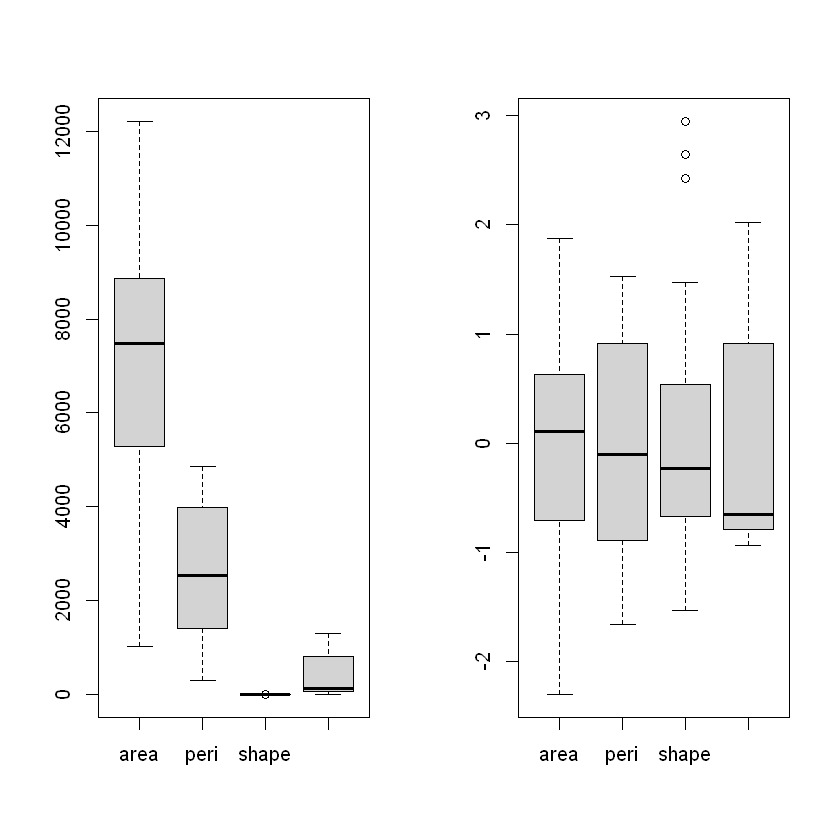

In [10]:
# Normalize installieren und aufrufen
install.packages("normalize")
library("normalize")

# Daten einlesen
# Verwendung des Datensatzes rock
rock_data <- data.frame(rock)
head(rock_data)
# Normalisieren (Methode standardize)
data_n <- normalize(rock_data, method="standardize")

par(mfrow = c(1, 2))
# Boxplots für die Erkennung von Outliers
boxplot(rock_data)
boxplot(data_n)

Hierbei handelt es sich um  die Distanzmessungen, die für das hclust verwendet werden.

In [11]:
# Distanzen berechnen
dm_euclidian <- dist(data_n, method = "euclidean")

Hierbei handelt es sich um hclust single-linkage

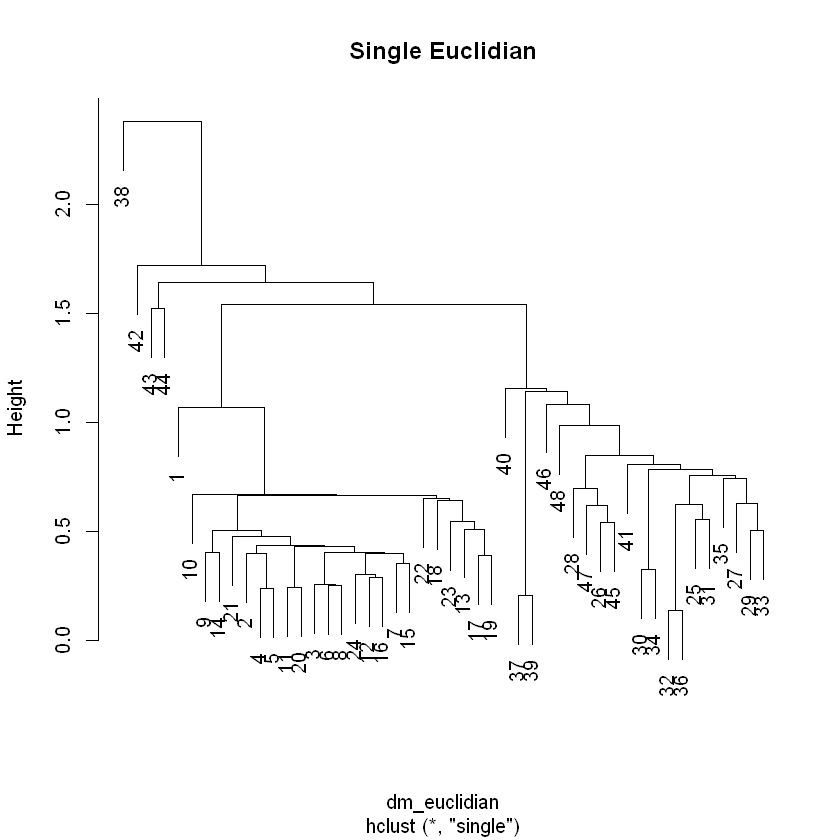

In [12]:
# hclust Berechnung, single-linkage
hclust_single1 <- hclust(dm_euclidian, method="single")
plot(hclust_single1, main = "Single Euclidian")

Hierbei handelt es sich um hclust complete-linkage

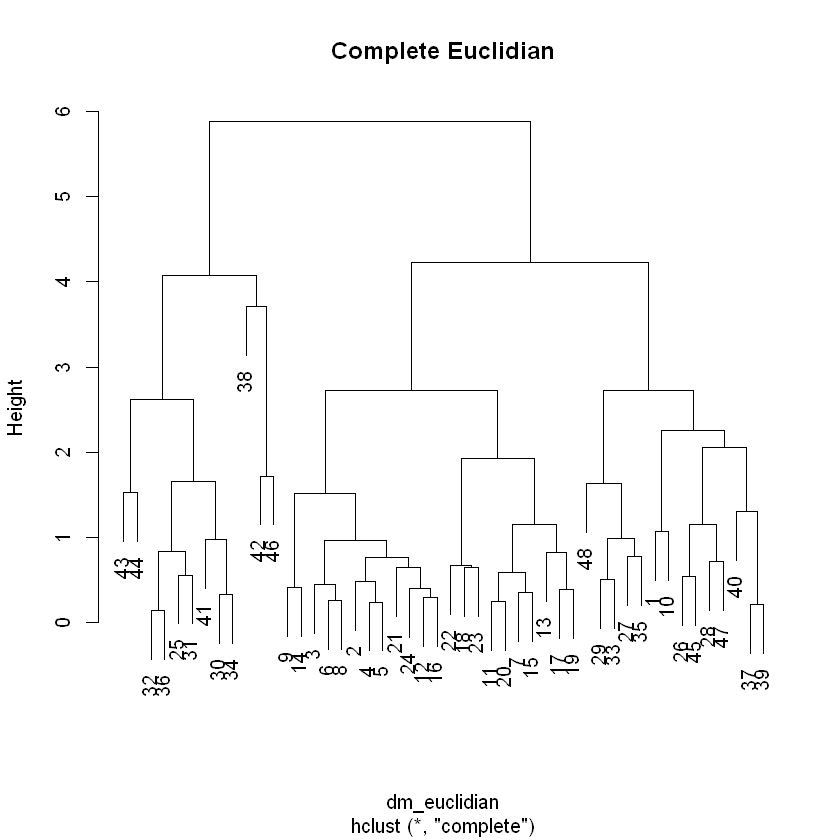

In [13]:
# hclust Berechnung, complete-linkage
hclust_single1 <- hclust(dm_euclidian, method="complete")
plot(hclust_single1, main = "Complete Euclidian")

Hierbei handelt es sich um hclust average-linkage

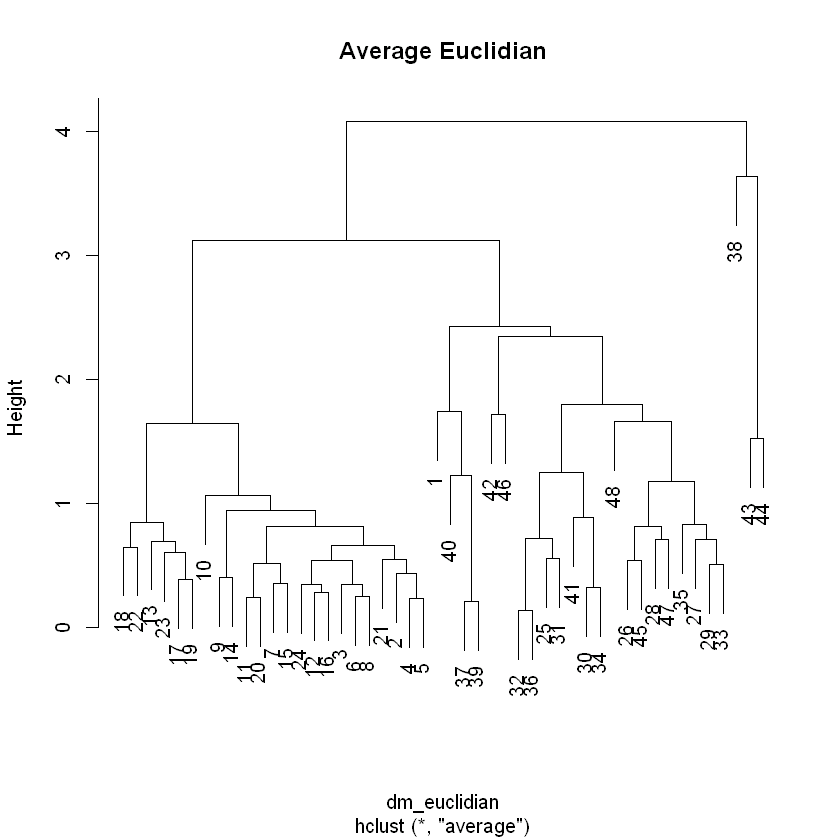

In [14]:
# hclust Berechnung, average-linkage
hclust_single1 <- hclust(dm_euclidian, method="average")
plot(hclust_single1, main = "Average Euclidian")

Hierbei handelt es sich um hclust ward-linkage

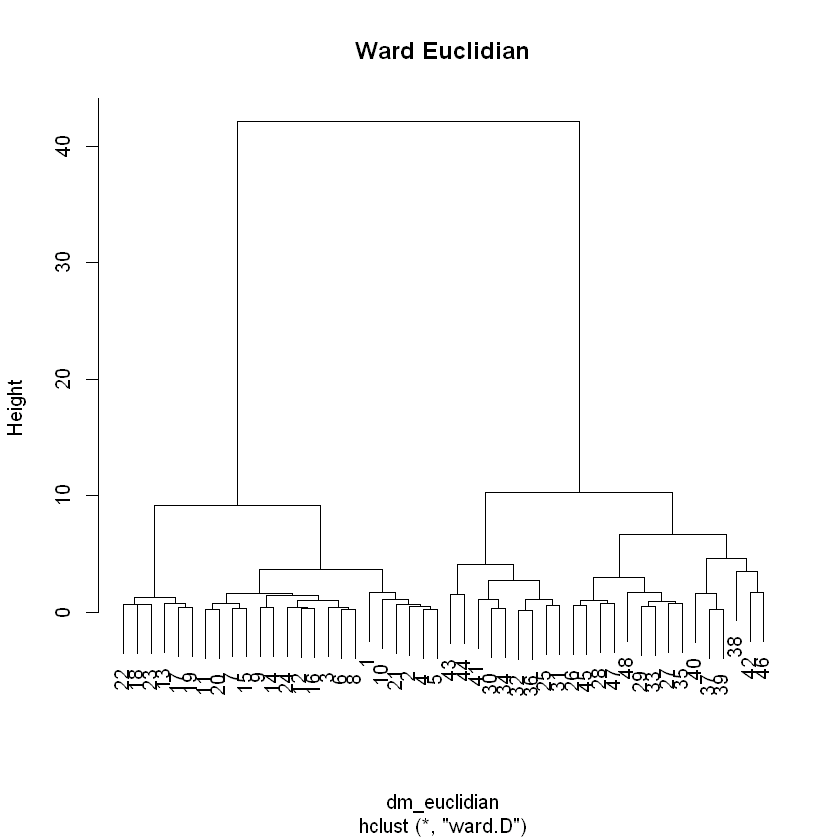

In [15]:
# hclust Berechnung, ward-linkage
hclust_single1 <- hclust(dm_euclidian, method="ward.D")
plot(hclust_single1, main = "Ward Euclidian")

### Resultat Vorgehensweise hierarchische Clutseranalyse
<div style="text-align: justify;">
    
-   Die Outliers sind sehr gering in der Anzahl, sowohl im nicht normalisierten Datensatz, wie auch nach dem Normalisieren.
    Dies kann man gut bei shape erkennen.
    Nach dem Normalisieren gibt es drei Outliers, die weiter vom Median entfernt sind.
    Insgesamt gesehen, sollten diese wenigen Werte keinen grossen Einfluss auf das Clustering haben.
    Ansonsten müsste man sehen, ob man jene entfernen kann und/oder eine Methode auswählen, die mit Outliers umgehen kann.

-   Je nach gewählter Distanz und Methode fallen die Resultate anders aus.
    Single kann Outliers gut entdecken, complete formt kompaktere Cluster, average ist ähnlich zu complete und Ouliers werden besser berücksichtigt, centroid funktioniert bei Daten mit wenig Gleichheit, ward formt ebenfalls kompaktere Cluster.
    (Siehe Tabelle in <https://rpubs.com/pjmurphy/599072>)

-   Auffallend ist bei der Verwendung von ward, dass die Dendrogramme sich sehr ähnlich sind, im Vergleich zu den anderen Methoden.

-   Welches Clustering nun besser ist oder sich weniger eignet, in Zusammenhang mit der gewählten Mthode kann untersucht werden.

</div>

# Einleitung k-means Clusteranalyse
<div style="text-align: justify;">
    
Vorgehensweise k-means Clusteranalyse:

-   Mit Screeplot und Silhouette die geeignete Clusteranzahl bestimmen

-   R kmeans verwenden

-   Cluster Plot für k-Means und k-Medoid

-   Silhouette Plot für k-Means und k-Medoid
</div>

# Statistisches Vorgehen k-means Clusteranalyse

In [17]:
suppressMessages(suppressWarnings(install.packages("tidyverse")))
suppressPackageStartupMessages(library(tidyverse))
suppressMessages(suppressWarnings(install.packages("factoextra")))
suppressPackageStartupMessages(library(factoextra))
suppressMessages(suppressWarnings(install.packages("fpc")))
suppressPackageStartupMessages(library(fpc))
suppressPackageStartupMessages(library(ggplot2))
suppressMessages(suppressWarnings(install.packages("cluster")))
suppressPackageStartupMessages(library(cluster))

Der Silhouette Plot zeigt an, dass zwei Cluster ideal sind.

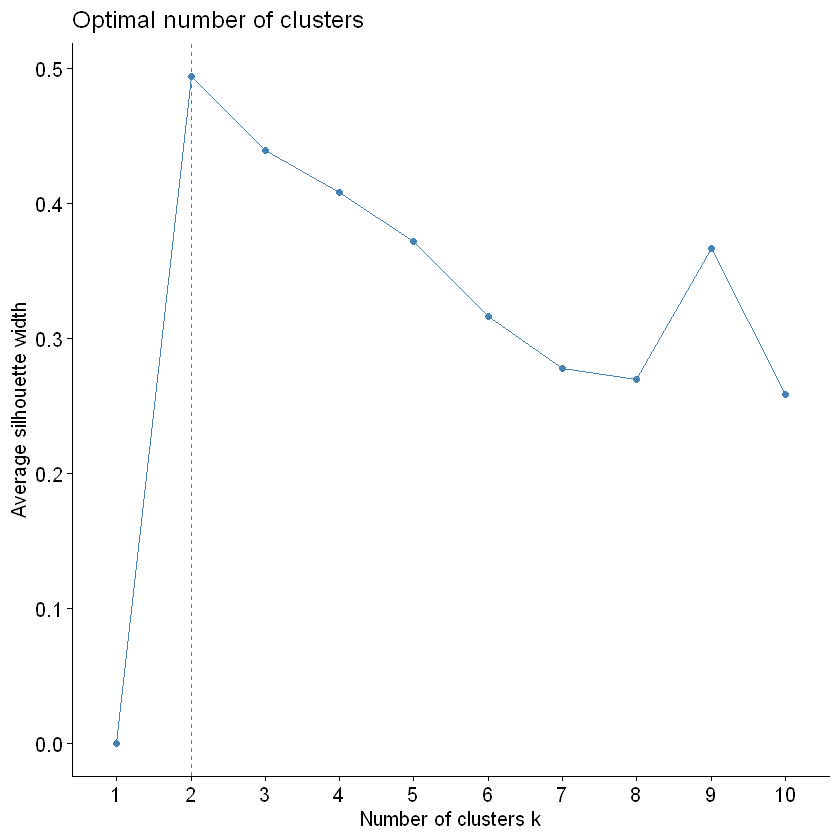

In [18]:
# Clusteranzahl bestimmen, Silhouette
fviz_nbclust(data_n, kmeans, method='silhouette')

Anbei die Elemente pro Cluster und die Bestimmung der Centroids.

In [19]:
# kmeans Berechnung
means <- kmeans(data_n, 2)
means$size
means$centers

[1] 24 24

,area,peri,shape,perm
1,0.653376,0.9292371,-0.4900107,-0.7869704
2,-0.653376,-0.9292371,0.4900107,0.7869704


Ein Silhouette Plot mit pam.

Warning message:
"package 'cluster' is in use and will not be installed"


Medoids:
     ID       area       peri       shape       perm
[1,] 15  0.8306246  0.9200208 -0.54545349 -0.7607038
[2,] 29 -0.2528940 -0.5804460  0.08507632  1.0838973
Clustering vector:
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2
Objective function:
   build     swap 
1.236789 1.200561 

Available components:
 [1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
 [6] "clusinfo"   "silinfo"    "diss"       "call"       "data"      

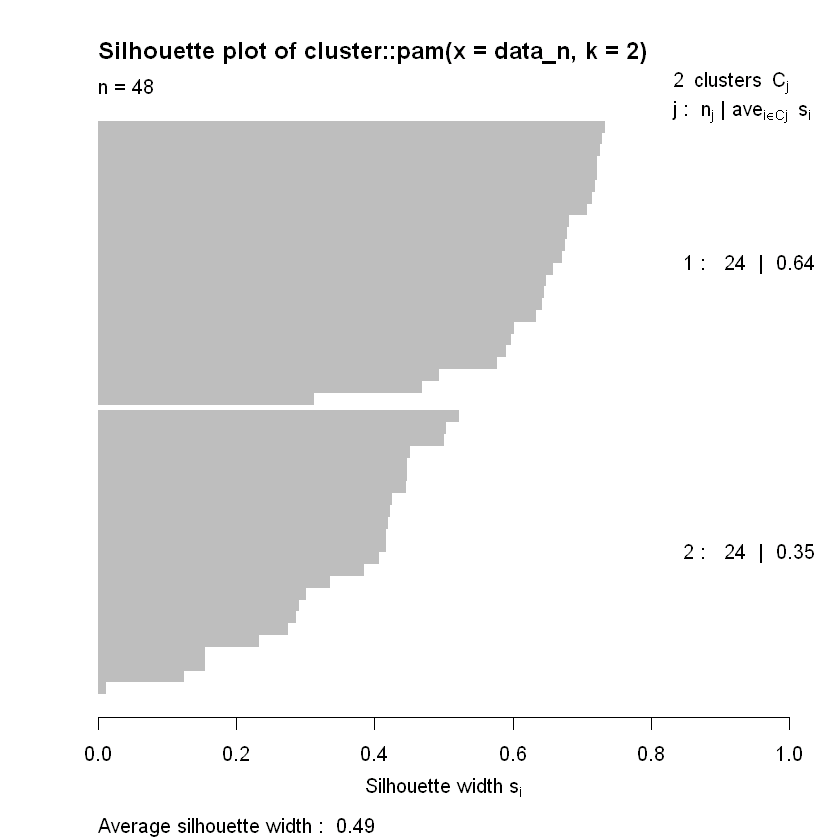

In [20]:
# Silhouette Scores und Plot (M)
install.packages("cluster")
score <- cluster::pam(data_n, k = 2)
score
plot(cluster::silhouette(score))

Der k-Means Cluster Plot.

K-means clustering with 2 clusters of sizes 24, 24

Cluster means:
       area       peri      shape       perm
1 -0.653376 -0.9292371  0.4900107  0.7869704
2  0.653376  0.9292371 -0.4900107 -0.7869704

Clustering vector:
 [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 63.19736 21.61153
 (between_SS / total_SS =  54.9 %)

Available components:

 [1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
 [6] "betweenss"    "size"         "iter"         "ifault"       "clust_plot"  
[11] "silinfo"      "nbclust"      "data"        

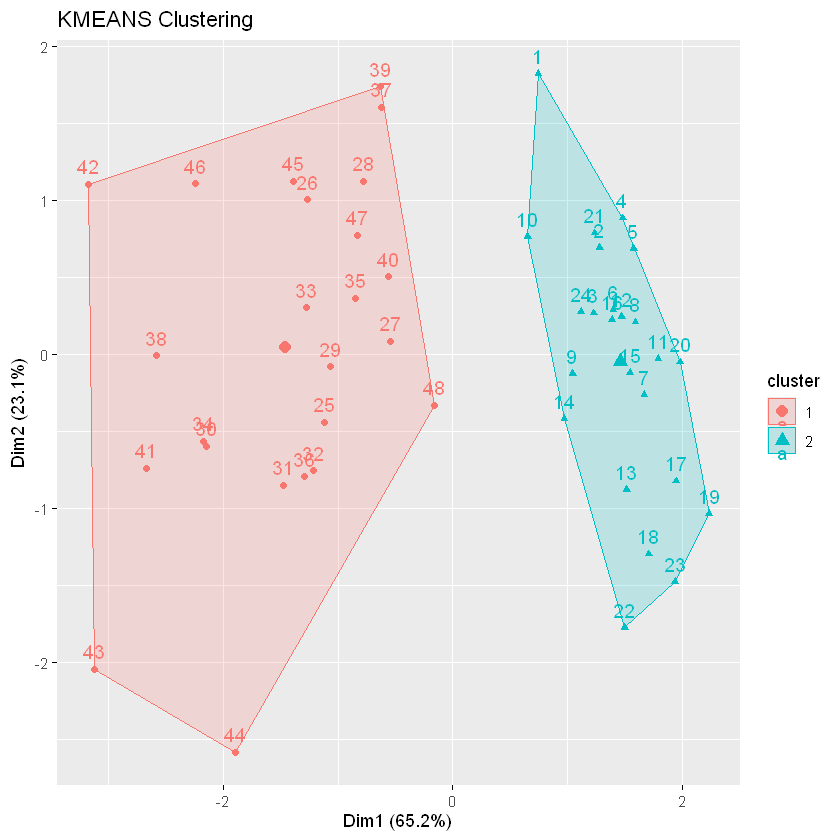

In [21]:
# Cluster Plot für k-Means
km <- eclust(data_n, "kmeans", hc_metric="euclidean",k=2)
km

Der k-Medoid Cluster Plot.

Medoids:
     ID       area       peri       shape       perm
[1,] 15  0.8306246  0.9200208 -0.54545349 -0.7607038
[2,] 29 -0.2528940 -0.5804460  0.08507632  1.0838973
Clustering vector:
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2
Objective function:
   build     swap 
1.236789 1.200561 

Available components:
 [1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
 [6] "clusinfo"   "silinfo"    "diss"       "call"       "data"      
[11] "clust_plot" "nbclust"   

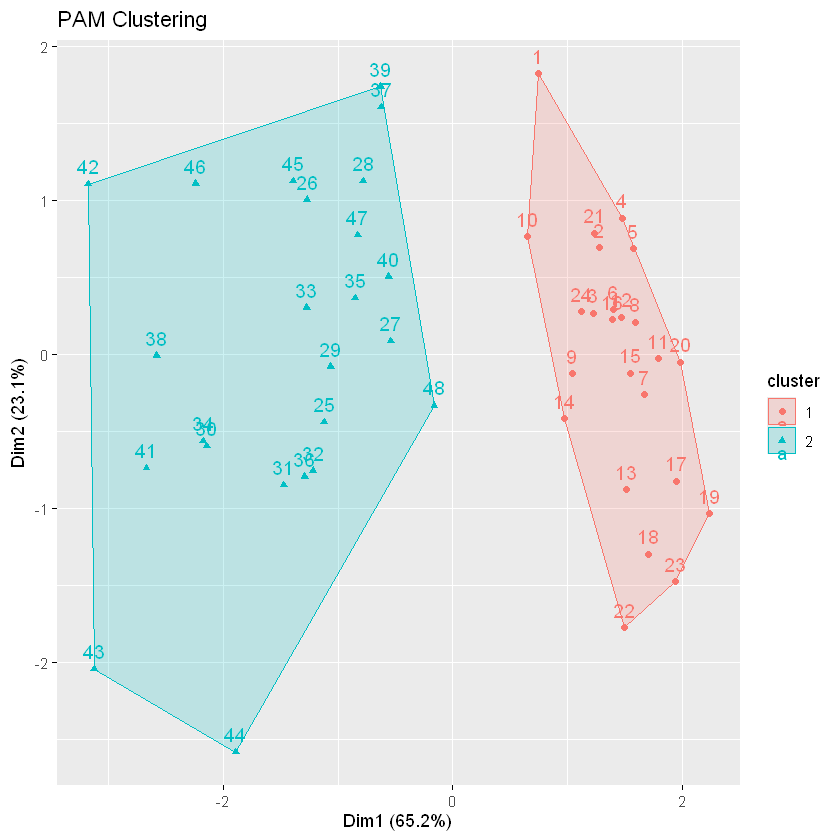

In [22]:
# Cluster Plot für k-Medoid
km2 <- eclust(data_n, "pam", hc_metric="euclidean",k=2)
km2

Der Cluster Silhouette Plot

  cluster size ave.sil.width
1       1   24          0.35
2       2   24          0.64


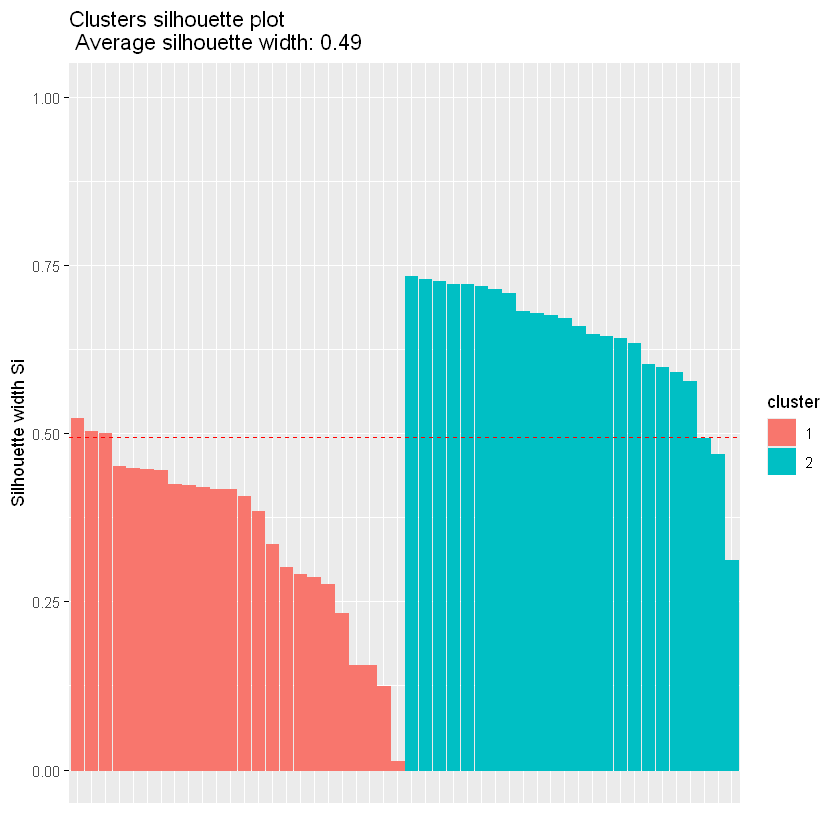

In [23]:
# Cluster Silhouette Plot
a1 = fviz_silhouette(km)
a1

### Resultat k-means Clusteranalyse
<div style="text-align: justify;">

-   Die Clusterbestimmung mit Silhouette zeigt an, dass 2 Cluster ideal sind (Optimal number of clusters).

-   Means zeigt die Centroid Positionen an, hier zwei Cluster und ebenfalls die Clustergrösse von 24 pro Cluster.

-   Der Silhouette Plot zeigt pro Cluster an, wie gut die Datenpunkte dem Cluster zugehörig sind.
    Bei dem zweiten Cluster sieht man wenige Werte, die nahe der Null sich befinden.
    Im ersten Cluster sind die meisten Punkte weit von der Null entfernt.
    Der ave.sil.width von 0.35 zeigt aber eher eine schwaches Resultat und 0.64 eher eine stärkeres Resultat.Der Mittelwert von 0.49 ist eher gering.

-   Der Cluster Plot zeigt die beiden Cluster an, man erkennt eine klare Auftrennung.
    Im Gegenteil zu der Bewertung mit dem ave.sil.width kann man hier sagen, dass gut geclustert wird.

-   Der Cluster Silhouette Plot zeigt beim ersten Cluster Schwächen an, dass fast alle Werte unter der 0.5 Marke sind.
    Bei dem zweiten Cluster sind fast alle Werte über der 0.5 Marke.
    Es sind keine grossen Fluktuationen vorhanden, die Breiten sind bei allen fast gleich gross.

-   Es soll noch angemerkt werden, dass mit pam eher eine k-Medoid Cluseranalyse vorgenommen wird.
    Daher macht es auch Sinn, dass die beiden Silhouette Plots sich unterscheiden, denn der eine wird mit k-Medoid berücksichtigt, der andere mit k-Means.
    Die visuelle Analyse gibt dieselben Resultate.
    Somit ist klar, dass mit einer visuellen Bestimmung die Zahlen nicht minder wichtig sind, um eine gute Beurteilung vornehmen zu können.

</div>

# Beschreibung Ergebnisse
<div style="text-align: justify;">
Die Ergebnisse kommen alle bei den bereits erwähnten Resultaten vor.
</div>

# Analyse/Hinterfragen Ergebnisse
<div style="text-align: justify;">
Die Analyse der Ergebnisse kommt bei den bereits erwähnten Resultaten vor.
</div>

# Quellenangaben
<div style="text-align: justify;">

-   Daten von R (24.12.2024)
    
-   Andreas Handl, Torben Kuhlenkasper.
    (2017) Multivariate Analysemethoden (3. Auflage).
    Springer Spektrum.

-   Cluster analysis, <https://rpubs.com/Tetiana/clustering-in-r> (24.12.2024)
</div>